In [9]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold

In [10]:
data = pd.read_csv("life_expectancy_clean.csv")


In [11]:
X = data.drop('Life expectancy ',axis=1)
y = data['Life expectancy ']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

In [13]:
X_test

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
717,Democratic People's Republic of Korea,2003,Developing,165.0,12,3.13,0.000000,27.0,0,26.7,...,99.0,NaN,68.0,0.1,NaN,NaN,5.8,5.8,NaN,NaN
1425,Kyrgyzstan,2000,Developing,225.0,4,2.13,0.000000,44.0,16,35.6,...,99.0,4.68,99.0,0.1,NaN,NaN,3.6,3.6,0.586,11.4
2367,Solomon Islands,2009,Developing,192.0,0,1.21,244.397644,92.0,0,45.5,...,98.0,7.92,92.0,0.1,1158.282672,51679.0,1.2,1.2,0.494,9.3
2487,Suriname,2001,Developing,219.0,0,4.23,191.213504,NaN,0,48.3,...,65.0,8.38,68.0,1.8,1598.775120,47774.0,3.6,3.5,0.000,11.0
2352,Slovenia,2008,Developed,96.0,0,10.94,392.958854,NaN,0,55.8,...,97.0,8.47,97.0,0.1,2751.812700,221316.0,1.7,1.7,0.869,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,United Republic of Tanzania,2011,Developing,348.0,88,4.04,0.000000,9.0,1622,21.3,...,88.0,5.72,9.0,3.1,NaN,NaN,7.0,6.9,NaN,NaN
858,Eritrea,2007,Developing,329.0,6,1.23,11.423860,91.0,55,14.7,...,91.0,3.29,91.0,1.3,317.329434,4153332.0,9.2,9.2,0.405,5.3
1603,Maldives,2014,Developing,62.0,0,0.01,2051.748615,99.0,0,26.2,...,99.0,13.73,99.0,0.1,7716.241500,41.0,13.6,13.7,0.693,12.7
1113,Guyana,2008,Developing,218.0,1,7.32,493.327929,93.0,0,4.9,...,93.0,7.46,93.0,0.8,2576.124957,746314.0,5.6,5.4,0.618,10.7


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [15]:
data['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

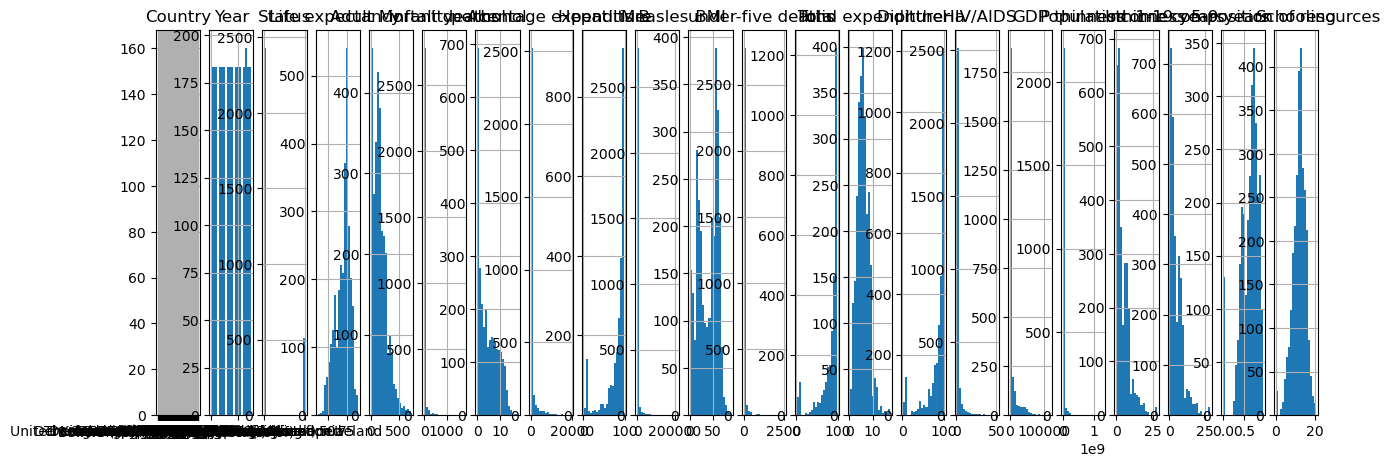

In [19]:
# Создаем новое графическое окно
fig, axes = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(15, 5))

# Цикл по всем столбцам данных
for ax, column in zip(axes, data.columns):
    data[column].hist(bins=20, ax=ax)
    ax.set_title(column)

# Показываем графики
plt.show()

In [17]:

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Peter\.conda\envs\Training_XG_Boost\lib\site-packages\xgboost\data.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  or is_sparse(dtype)
C:\Users\Peter\.conda\envs\Training_XG_Boost\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Peter\.conda\envs\Training_XG_Boost\lib\site-packages\xgboost\data.py:375: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or (is_categorical_dtype(dtype) and enable_categorical)
C:\Users\Peter\.conda\envs\Training_XG_Boost\lib\site-packages\xgboost\data.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, 

ValueError: 
All the 125 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Peter\.conda\envs\Training_XG_Boost\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Peter\.conda\envs\Training_XG_Boost\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\Peter\.conda\envs\Training_XG_Boost\lib\site-packages\xgboost\sklearn.py", line 988, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "C:\Users\Peter\.conda\envs\Training_XG_Boost\lib\site-packages\xgboost\sklearn.py", line 448, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
  File "C:\Users\Peter\.conda\envs\Training_XG_Boost\lib\site-packages\xgboost\sklearn.py", line 908, in _create_dmatrix
    return DMatrix(**kwargs, nthread=self.n_jobs)
  File "C:\Users\Peter\.conda\envs\Training_XG_Boost\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\Peter\.conda\envs\Training_XG_Boost\lib\site-packages\xgboost\core.py", line 743, in __init__
    handle, feature_names, feature_types = dispatch_data_backend(
  File "C:\Users\Peter\.conda\envs\Training_XG_Boost\lib\site-packages\xgboost\data.py", line 957, in dispatch_data_backend
    return _from_pandas_df(data, enable_categorical, missing, threads,
  File "C:\Users\Peter\.conda\envs\Training_XG_Boost\lib\site-packages\xgboost\data.py", line 404, in _from_pandas_df
    data, feature_names, feature_types = _transform_pandas_df(
  File "C:\Users\Peter\.conda\envs\Training_XG_Boost\lib\site-packages\xgboost\data.py", line 378, in _transform_pandas_df
    _invalid_dataframe_dtype(data)
  File "C:\Users\Peter\.conda\envs\Training_XG_Boost\lib\site-packages\xgboost\data.py", line 270, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Country: object, Status: object
